<a href="https://colab.research.google.com/github/firarru/TA/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url2020 = 'https://raw.githubusercontent.com/firarru/TA/refs/heads/main/Data/2020.csv'
url2021 = 'https://raw.githubusercontent.com/firarru/TA/refs/heads/main/Data/2021.csv'

df20 = pd.read_csv(url2020, sep=';')
df21 = pd.read_csv(url2021, sep=';')

/tmp/ipython-input-3864618148.py:4: DtypeWarning: Columns (11,12,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv(url2020, sep=';')
/tmp/ipython-input-3864618148.py:5: DtypeWarning: Columns (12,13,14,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv(url2021, sep=';')


In [3]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_STAMP   61474 non-null  object 
 1   ASSET_ID     61474 non-null  int64  
 2   PRESSURE     61474 non-null  object 
 3   TEMPERATURE  61474 non-null  object 
 4   ENERGY_RATE  61474 non-null  object 
 5   VOLUME_RATE  61474 non-null  object 
 6   C1           0 non-null      float64
 7   C2           61474 non-null  object 
 8   C3           61474 non-null  object 
 9   IC4          61474 non-null  object 
 10  NC4          61474 non-null  object 
 11  IC5          61474 non-null  object 
 12  NC5          61474 non-null  object 
 13  C6           61474 non-null  object 
 14  C7           61474 non-null  object 
 15  C8           61474 non-null  object 
 16  C9           61474 non-null  object 
 17  N2           61474 non-null  object 
 18  CO2          61474 non-null  object 
 19  H2O 

In [4]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61313 entries, 0 to 61312
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_STAMP   61313 non-null  object 
 1   ASSET_ID     61313 non-null  int64  
 2   PRESSURE     61313 non-null  object 
 3   TEMPERATURE  61313 non-null  object 
 4   ENERGY_RATE  61313 non-null  object 
 5   VOLUME_RATE  61313 non-null  object 
 6   C1           0 non-null      float64
 7   C2           61313 non-null  object 
 8   C3           61313 non-null  object 
 9   IC4          61313 non-null  object 
 10  NC4          61313 non-null  object 
 11  IC5          61313 non-null  object 
 12  NC5          61313 non-null  object 
 13  C6           61313 non-null  object 
 14  C7           61313 non-null  object 
 15  C8           61313 non-null  object 
 16  C9           61313 non-null  object 
 17  N2           61313 non-null  object 
 18  CO2          61313 non-null  object 
 19  H2O 

In [5]:
df20.drop(columns=['C1','HCDP'], inplace=True)
df21.drop(columns=['C1','HCDP'], inplace=True)

In [6]:
df20['DATE_STAMP'] = pd.to_datetime(df20['DATE_STAMP'], errors='coerce')
df21['DATE_STAMP'] = pd.to_datetime(df21['DATE_STAMP'], errors='coerce')

In [7]:
df = pd.concat([df20, df21], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122787 entries, 0 to 122786
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_STAMP   122787 non-null  datetime64[ns]
 1   ASSET_ID     122787 non-null  int64         
 2   PRESSURE     122787 non-null  object        
 3   TEMPERATURE  122787 non-null  object        
 4   ENERGY_RATE  122787 non-null  object        
 5   VOLUME_RATE  122787 non-null  object        
 6   C2           122787 non-null  object        
 7   C3           122787 non-null  object        
 8   IC4          122787 non-null  object        
 9   NC4          122787 non-null  object        
 10  IC5          122787 non-null  object        
 11  NC5          122787 non-null  object        
 12  C6           122787 non-null  object        
 13  C7           122787 non-null  object        
 14  C8           122787 non-null  object        
 15  C9           122787 non-null  obje

In [8]:
# df['Year'] = df['DATE_STAMP'].dt.year
# df['Month'] = df['DATE_STAMP'].dt.month
# df['Day'] = df['DATE_STAMP'].dt.day

In [9]:
df['DATE_STAMP'] = pd.to_datetime(df['DATE_STAMP'])

df_filter = df.loc[
    (df['DATE_STAMP'] >= '2020-06-01 00:00:00') &
    (df['DATE_STAMP'] <= '2021-06-30 23:00:00')
].reset_index(drop=True)

In [10]:
df = df_filter[['DATE_STAMP', 'ASSET_ID', 'PRESSURE']]

In [11]:
df['PRESSURE'] = (df['PRESSURE'].astype(str).str.replace(".", "", regex=False).astype(float))

/tmp/ipython-input-898852785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRESSURE'] = (df['PRESSURE'].astype(str).str.replace(".", "", regex=False).astype(float))


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66346 entries, 0 to 66345
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE_STAMP  66346 non-null  datetime64[ns]
 1   ASSET_ID    66346 non-null  int64         
 2   PRESSURE    66346 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


#**Mengambil Sample Data 5 Jam**


In [32]:
sample_date = "2020-06-01"

df_sample = df[(df['DATE_STAMP'].dt.date == pd.to_datetime(sample_date).date())
& (df['DATE_STAMP'].dt.hour < 5)].copy()

df_sample

,DATE_STAMP,ASSET_ID,PRESSURE
0,2020-06-01 00:00:00,133071,5.891031e+16
1,2020-06-01 00:00:00,133004,1.566112e+16
2,2020-06-01 00:00:00,133002,1.551272e+13
3,2020-06-01 00:00:00,133003,1.500153e+15
4,2020-06-01 00:00:00,133060,1.279108e+16
5,2020-06-01 00:00:00,133001,1.555127e+12
6,2020-06-01 00:00:00,133070,5.796616e+13
7,2020-06-01 01:00:00,133070,5.789583e+14
8,2020-06-01 01:00:00,133004,1.563403e+13
9,2020-06-01 01:00:00,133001,1.552637e+11


#**Normalisasi**

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
df_sample['PRESSURE_NORM'] = scaler.fit_transform(df_sample[['PRESSURE']])

#**Mendefinisikan Source & Sink**

In [34]:
source_ids = [133002, 133003, 133004, 133060]
sink_id = 133071

df_source = df_sample[df_sample["ASSET_ID"].isin(source_ids)]
df_sink = df_sample[df_sample["ASSET_ID"] == sink_id]

# **Menghitung bobot edge dari ht​=Psink,t​−Psource,t​**

In [35]:
df_edge = df_source.merge(df_sink[['DATE_STAMP', 'PRESSURE_NORM']], on='DATE_STAMP', how='inner', suffixes=('_source','_sink'))

In [36]:
df_edge['EDGE_WEIGHT'] = (df_edge['PRESSURE_NORM_sink'] - df_edge['PRESSURE_NORM_source'])

In [37]:
df_edge

,DATE_STAMP,ASSET_ID,PRESSURE,PRESSURE_NORM_source,PRESSURE_NORM_sink,EDGE_WEIGHT
0,2020-06-01 00:00:00,133004,1.566112e+16,0.265847,1.000000,0.734153
1,2020-06-01 00:00:00,133002,1.551272e+13,0.000263,1.000000,0.999737
2,2020-06-01 00:00:00,133003,1.500153e+15,0.025465,1.000000,0.974535
3,2020-06-01 00:00:00,133060,1.279108e+16,0.217128,1.000000,0.782872
4,2020-06-01 01:00:00,133004,1.563403e+13,0.000265,0.009999,0.009734
5,2020-06-01 01:00:00,133002,1.549067e+15,0.026295,0.009999,-0.016296
6,2020-06-01 01:00:00,133003,1.498398e+16,0.254352,0.009999,-0.244353
7,2020-06-01 01:00:00,133060,1.282924e+16,0.217776,0.009999,-0.207777
8,2020-06-01 02:00:00,133003,1.496643e+16,0.254054,0.099959,-0.154095
9,2020-06-01 02:00:00,133004,1.561577e+15,0.026508,0.099959,0.073452


#**Menampilkan graf**

In [38]:
# menentukan windows sliding 5 jam
window_times = df_edge["DATE_STAMP"].sort_values().unique()[:5]

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

G_ref = nx.DiGraph()

for _, row in df_edge.iterrows():
  G_ref.add_edge(row["ASSET_ID"], sink_id, weight=row["EDGE_WEIGHT"])

pos = nx.spring_layout(G_ref, seed=42)

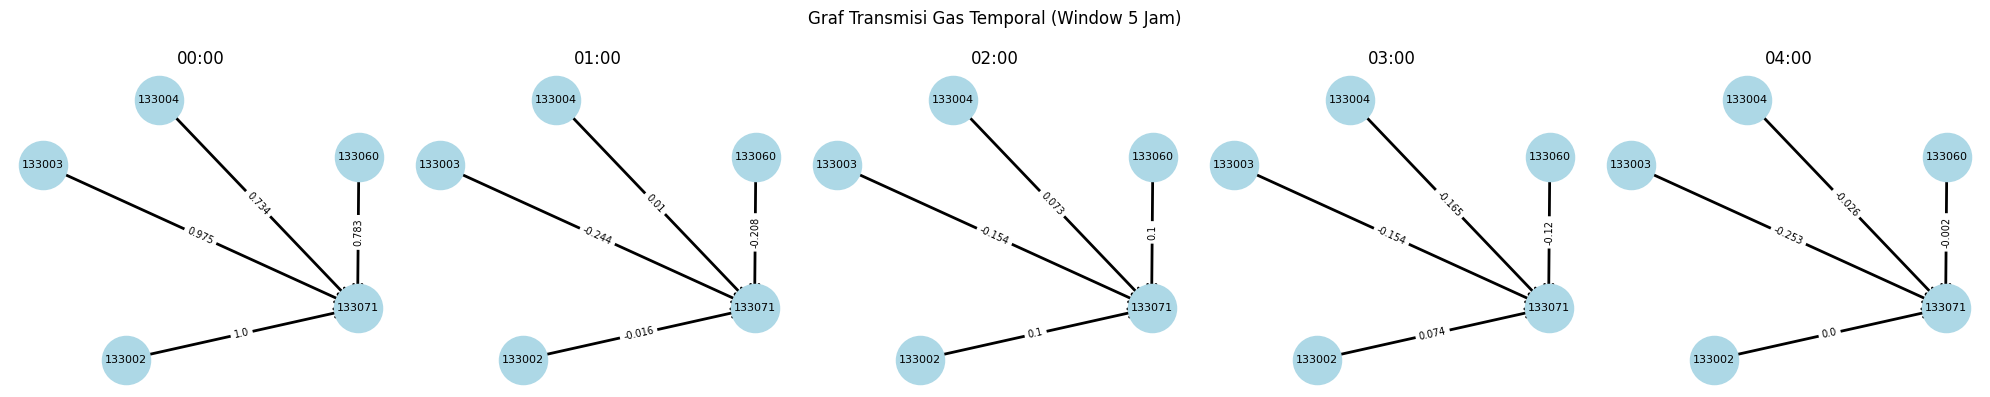

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for ax, t in zip(axes, window_times):

    df_t = df_edge[df_edge["DATE_STAMP"] == t]

    G = nx.DiGraph()
    for _, row in df_t.iterrows():
        G.add_edge(
            row["ASSET_ID"],
            sink_id,
            weight=round(row["EDGE_WEIGHT"], 3)
        )

    # node
    nx.draw_networkx_nodes(
        G, pos,
        node_size=1200,
        node_color="lightblue",
        ax=ax
    )

    # edge
    nx.draw_networkx_edges(
        G, pos,
        arrowstyle="->",
        arrowsize=15,
        width=2,
        ax=ax
    )

    # label node
    nx.draw_networkx_labels(
        G, pos,
        font_size=8,
        ax=ax
    )

    # label edge (bobot)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_size=7,
        ax=ax
    )

    ax.set_title(t.strftime("%H:%M"))
    ax.axis("off")

plt.suptitle("Graf Transmisi Gas Temporal (Window 5 Jam)")
plt.tight_layout()
plt.show()


# **Ekstraksi Fitur Statistik**

In [42]:
edge_records = []

for t in sorted(window_times):
    df_t = df_edge[df_edge["DATE_STAMP"] == t]

    for _, row in df_t.iterrows():
        edge_records.append({
            "time": t,
            "source": row["ASSET_ID"],
            "sink": sink_id,
            "weight": row["EDGE_WEIGHT"]
        })

df_edge_ts = pd.DataFrame(edge_records)


In [43]:
df_edge_ts

,time,source,sink,weight
0,2020-06-01 00:00:00,133004,133071,0.734153
1,2020-06-01 00:00:00,133002,133071,0.999737
2,2020-06-01 00:00:00,133003,133071,0.974535
3,2020-06-01 00:00:00,133060,133071,0.782872
4,2020-06-01 01:00:00,133004,133071,0.009734
5,2020-06-01 01:00:00,133002,133071,-0.016296
6,2020-06-01 01:00:00,133003,133071,-0.244353
7,2020-06-01 01:00:00,133060,133071,-0.207777
8,2020-06-01 02:00:00,133003,133071,-0.154095
9,2020-06-01 02:00:00,133004,133071,0.073452
